# April-July 2020 Dataset
### This dataset looks at the opinions of year 10 students during the first lockdown in the UK. It looks at students from most and least deprived backgrounds within their quintile.It looks at the impact of schoolclosures and the shift to remote learing.

## Data structure:

### Rows:show responses 
### Columns:>
### Classifier: Groups certain questions 
### Questions: Specific survey questions asked 
### Response: answers/options for each question
### All persons: Overall response by percentage 
### Most deprived: Children from deprived areas 
### Least deprived: Children from least deprived areas 
### ULC looks at Upper confidence limit for each group (precision of percentage estimates)
### LCL looks at Lower confidence limit for each group (precision of percentage estimates)

## Understanding the quintiles 
### The quintiles in the dataset represents different levels of deprivation within the population.
### Most deprived: Most disadvantaged group 
### 2nd quintile: Less disadvantegd than the most deprived group 
### 3rd quintile: Middle group , average group
### 4th quintile: This group is better off than the median 
### Least deprived: Themost advantaged group

## What is explored in the survery?

### • School Attendance: Whether students attended school in person during lockdown or at home

### • Availability and type of real-time online learning

### • Acess to Technology: The type of devices they had to access work and did the schools provide digital devices to assist with remote learning 

### • Engagment with School work: Frequency of contact with teachersor form tutors outside of subject lessons and number of days per week and hours per day spent on school work.

## Summary 
### This dataset looks at how COVID-19  lockdown affected year 10 students educational experiences it looks at how these effects varied across different socioeconmic backgrounds.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
#  Loading data ensuring that it fits the frame 
import pandas as pd 
data = pd.set_option('display.max_colwidth', None)
df_for_cleaning = pd.read_csv(r'../../4_integrated_csv_files/education_data/experiences_of_education_and_learning_during_the_first_lockdown_april_to_july_2020_by_income-related_deprivation.csv', index_col=0)
quintile_averages = df_for_cleaning.groupby('questions')[['Most deprived %', '2nd quintile %', '3rd quintile %', '4th quintile %', 'Least deprived %']].mean()
df_for_cleaning

,classifier,questions,response,All persons %,Most deprived %,2nd quintile %,3rd quintile %,4th quintile %,Least deprived %,All persons LCL,...,Most deprived LCL,Most deprived UCL,2nd quintile LCL,2nd quintile UCL,3rd quintile LCL,3rd quintile UCL,4th quintile LCL,4th quintile UCL,Least deprived LCL,Least deprived UCL
1,NaN,"Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?",Did not attend school in person,60,61,61,59,60,60,59,...,59,63,59,63,57,62,57,63,57,63
2,NaN,"Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?",Attended school in person,40,39,39,41,40,40,38,...,37,41,37,41,38,43,38,43,37,43
4,NaN,"Still thinking about the period of disruption in Year 10 – that is, April to July 2020. At that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]","Yes, for subject lessons",66,67,67,65,64,65,64,...,64,69,64,69,63,68,61,67,61,68
5,NaN,"Still thinking about the period of disruption in Year 10 – that is, April to July 2020. At that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]","Yes, for other reasons",14,10,13,14,17,18,13,...,9,12,12,15,12,16,15,19,16,20
6,NaN,"Still thinking about the period of disruption in Year 10 – that is, April to July 2020. At that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]",No,26,23,24,26,29,28,24,...,22,25,22,27,24,29,27,32,25,32
9,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 10 – that is, April to July 2020, about how many live online lessons did you attend?",NaN,5,7,6,4,5,3,4,...,5,8,5,8,3,5,3,6,2,4
10,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 10 – that is, April to July 2020, about how many live online lessons did you attend?",Less than one a week,5,5,6,5,4,4,4,...,4,6,4,7,3,6,3,6,3,5
11,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 10 – that is, April to July 2020, about how many live online lessons did you attend?",1 to 4 per week,21,24,21,23,20,19,20,...,22,27,19,23,20,26,17,23,16,22
12,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 10 – that is, April to July 2020, about how many live online lessons did you attend?",1 to 2 per day,14,13,15,14,15,16,13,...,11,15,13,17,12,16,13,18,14,19
13,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 10 – that is, April to July 2020, about how many live online lessons did you attend?",3 or more per day,55,52,53,55,56,58,53,...,49,55,49,56,52,59,52,60,54,62


In [6]:

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int'])

In [7]:
df_numeric

,All persons %,Most deprived %,2nd quintile %,3rd quintile %,4th quintile %,Least deprived %,All persons LCL,All persons UCL,Most deprived LCL,Most deprived UCL,2nd quintile LCL,2nd quintile UCL,3rd quintile LCL,3rd quintile UCL,4th quintile LCL,4th quintile UCL,Least deprived LCL,Least deprived UCL
1,60,61,61,59,60,60,59,62,59,63,59,63,57,62,57,63,57,63
2,40,39,39,41,40,40,38,41,37,41,37,41,38,43,38,43,37,43
4,66,67,67,65,64,65,64,67,64,69,64,69,63,68,61,67,61,68
5,14,10,13,14,17,18,13,15,9,12,12,15,12,16,15,19,16,20
6,26,23,24,26,29,28,24,27,22,25,22,27,24,29,27,32,25,32
9,5,7,6,4,5,3,4,6,5,8,5,8,3,5,3,6,2,4
10,5,5,6,5,4,4,4,5,4,6,4,7,3,6,3,6,3,5
11,21,24,21,23,20,19,20,23,22,27,19,23,20,26,17,23,16,22
12,14,13,15,14,15,16,13,16,11,15,13,17,12,16,13,18,14,19
13,55,52,53,55,56,58,53,57,49,55,49,56,52,59,52,60,54,62


# Visualisation

### The next codes contain visuals of the data using seaborn and or Matplotlib 

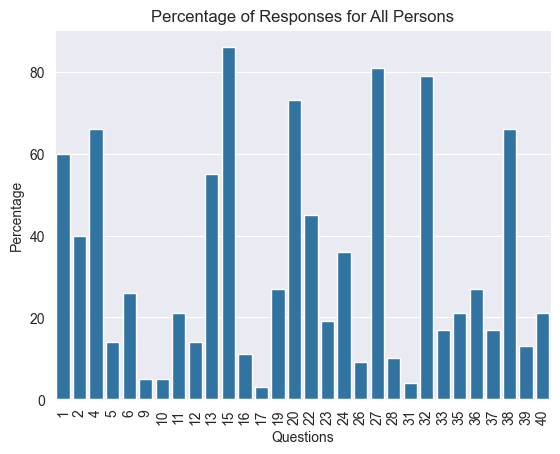

In [8]:
# bar plot to help visulise the percentage of response across different quintiles
# all persons against  questions 
plt.Figure(figsize=(10, 6))
sns.barplot(x=df_for_cleaning.index, y=df_for_cleaning['All persons %'])
plt.xticks(rotation=90)
plt.title('Percentage of Responses for All Persons')
plt.xlabel('Questions')
plt.ylabel('Percentage')

plt.show()


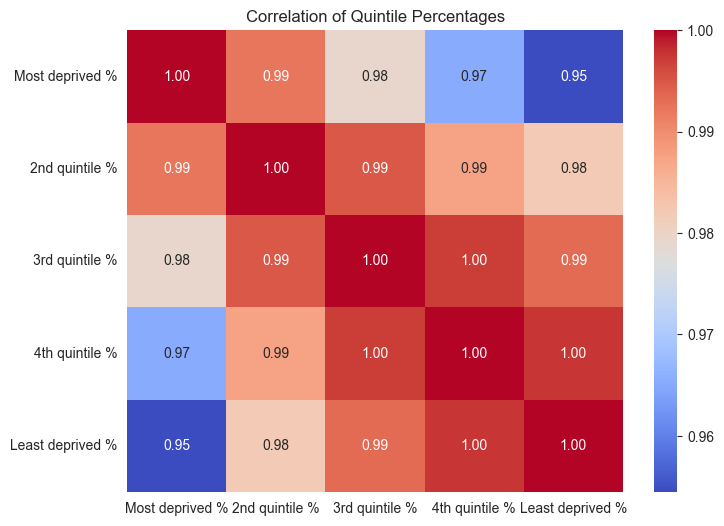

In [10]:
#correlation matrix
quintile_data = df_for_cleaning[['Most deprived %', '2nd quintile %', '3rd quintile %', '4th quintile %', 'Least deprived %']]
corr = quintile_data.corr()

# Plotting a heatmap of the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation of Quintile Percentages')
plt.show()


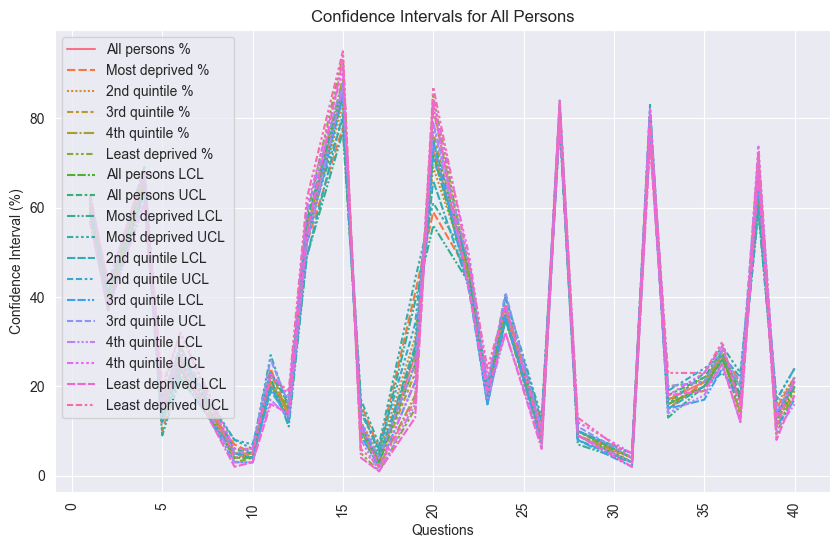

In [11]:
#line plot to see confidence intervals , this should compare the range 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_numeric)
plt.title('Confidence Intervals for All Persons')
plt.xlabel('Questions')
plt.ylabel('Confidence Interval (%)')
plt.xticks(rotation=90)
plt.show()

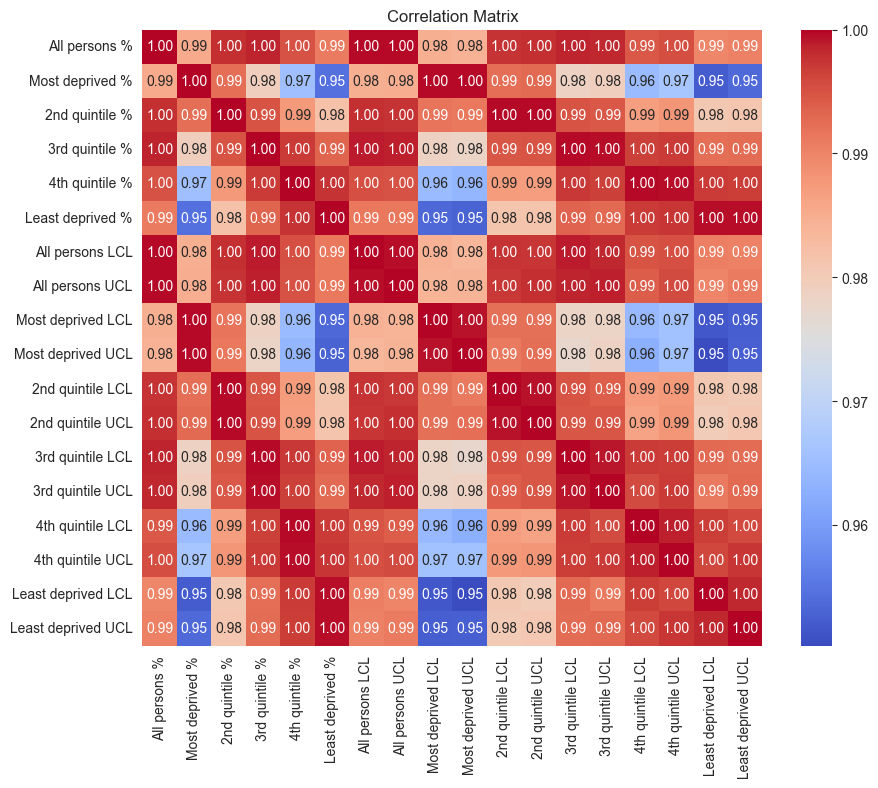

In [12]:

# heatmap for correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

These next visulisations are based on the questions and their reponses by quitile

1st Question: Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?

Response to the first Question: Did not attend school in person


1st Question: Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the first Question: Did not attend school in person


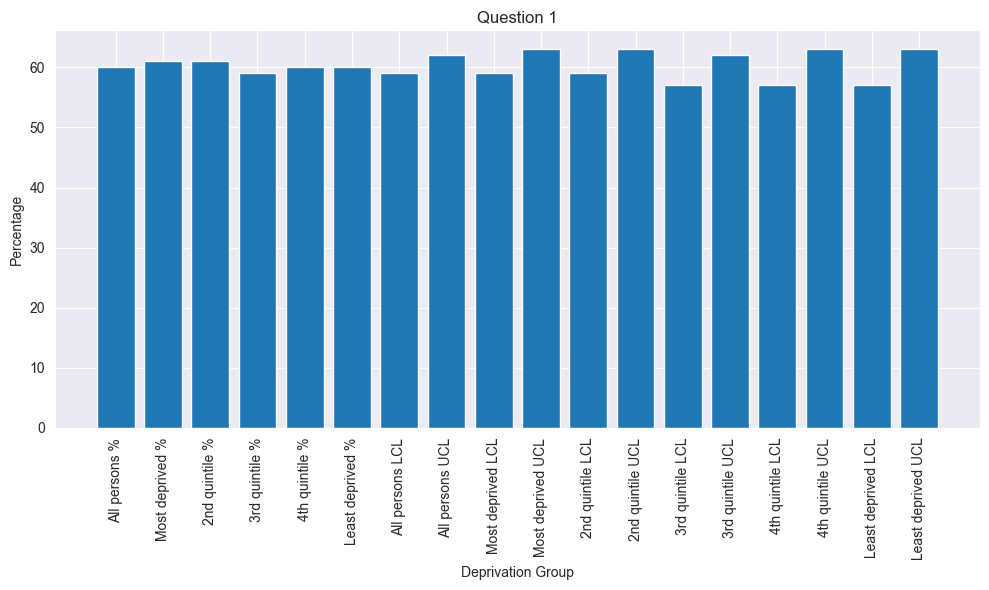

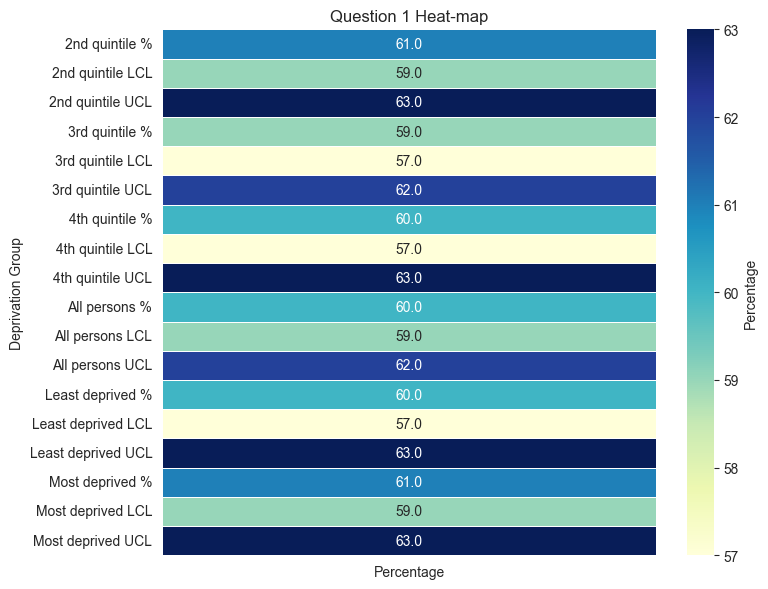

In [13]:
#plotting 1st question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[0:1]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
first_question = df_for_cleaning.loc[1, 'questions']
first_response = df_for_cleaning.loc[1, 'response']
print("1st Question:", first_question)
print("Response to the first Question:", first_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 1')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 1 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()


2nd Question: Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?

Response to the 2nd Question: Attended school in person


Second Question: Between April and July 2020, when you were in Year 10, schools were closed to most students as part of the national lockdown. Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the Second Question: Attended school in person


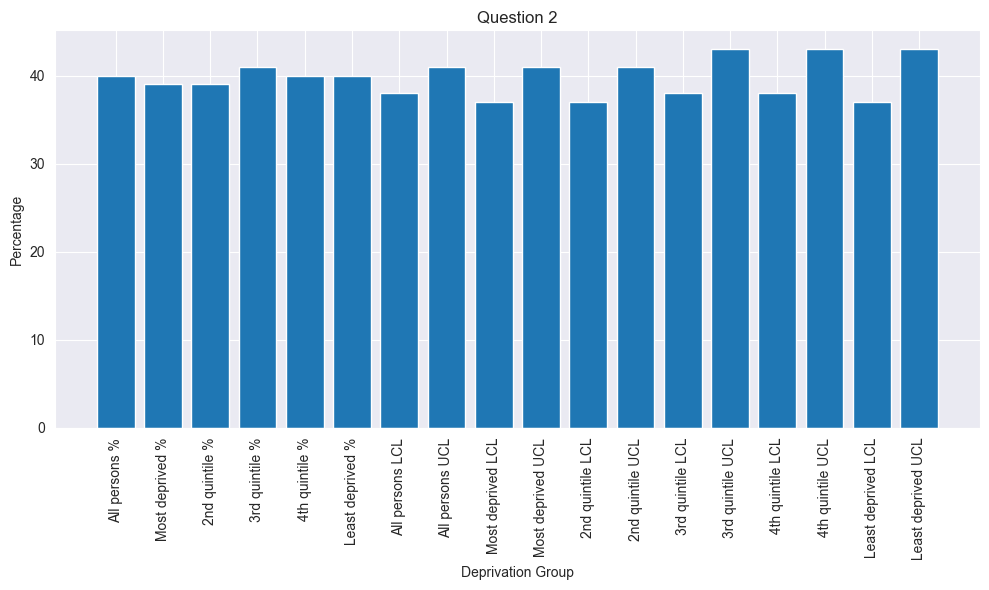

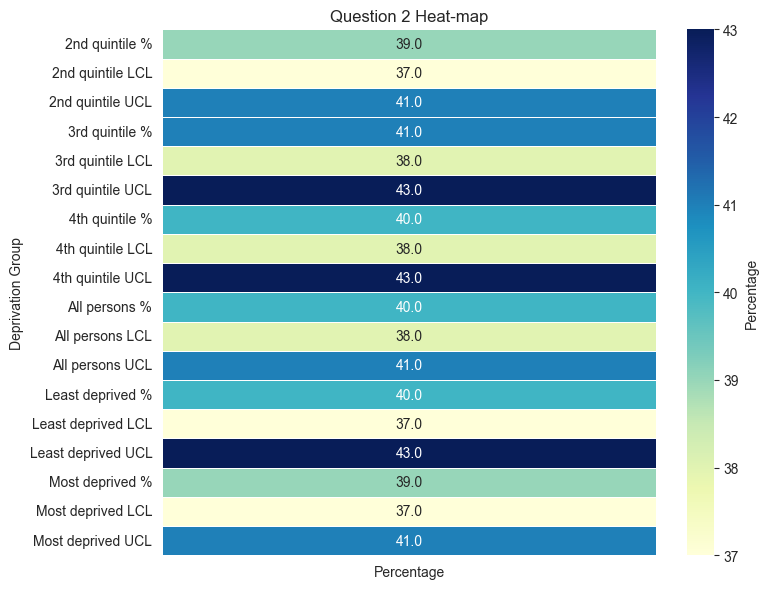

In [14]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[1:2]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
second_question = df_for_cleaning.loc[2, 'questions']
second_response = df_for_cleaning.loc[2, 'response']
print("Second Question:", second_question)
print("Response to the Second Question:", second_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
   cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 2 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

15th Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?

Response to the 15th Question: Yes, I had a suitable device such as a laptop, tablet, Chromebook


Fifteenth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the Fifteenth Question: Yes, I had a suitable device such as a laptop, tablet, Chromebook


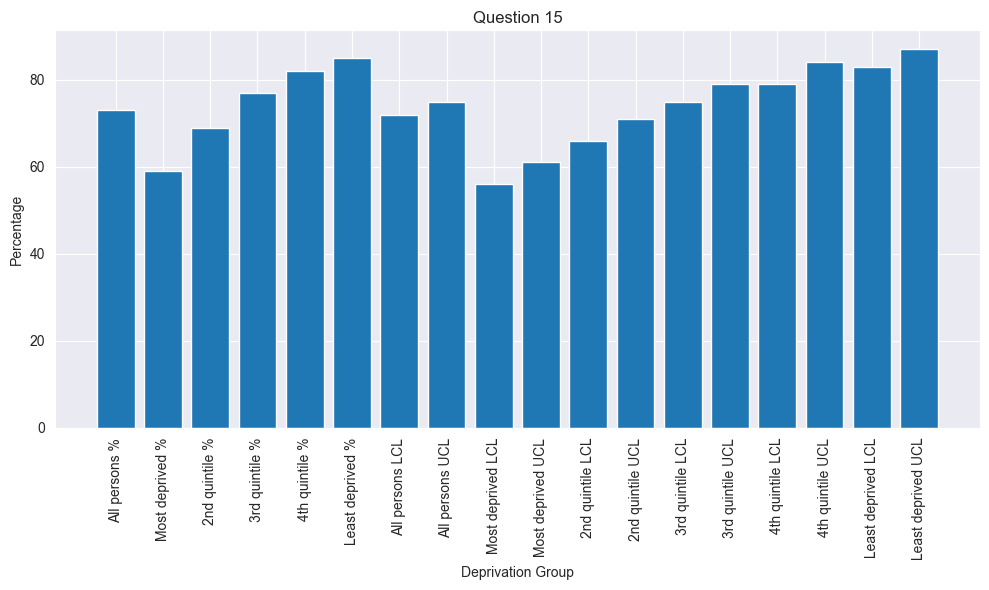

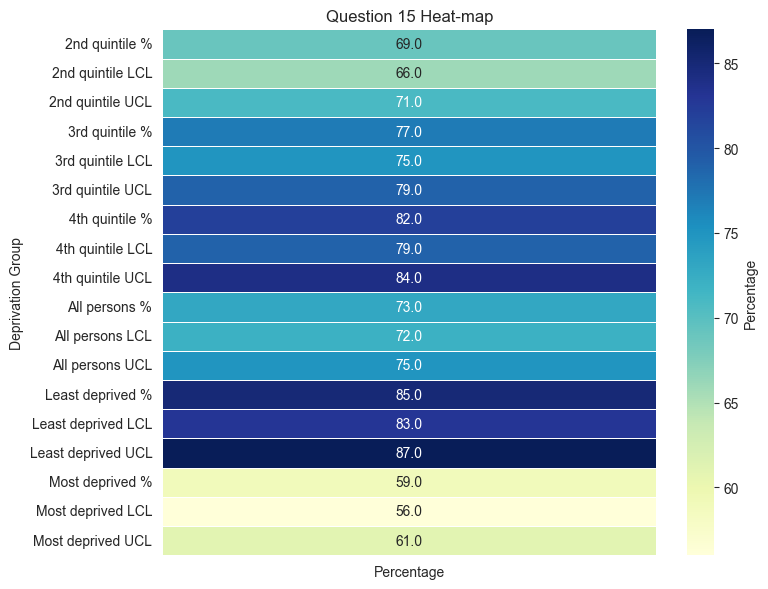

In [15]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[14:15]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
fifteenth_question = df_for_cleaning.loc[15, 'questions']
fifteenth_response = df_for_cleaning.loc[15, 'response']
print("Fifteenth Question:", fifteenth_question)
print("Response to the Fifteenth Question:", fifteenth_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 15')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 15 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

Sixteenth Question:
 At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?

Response to the Sixteenth Question:
 I could only access online work via a mobile


Sixteenth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the Sixteenth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?


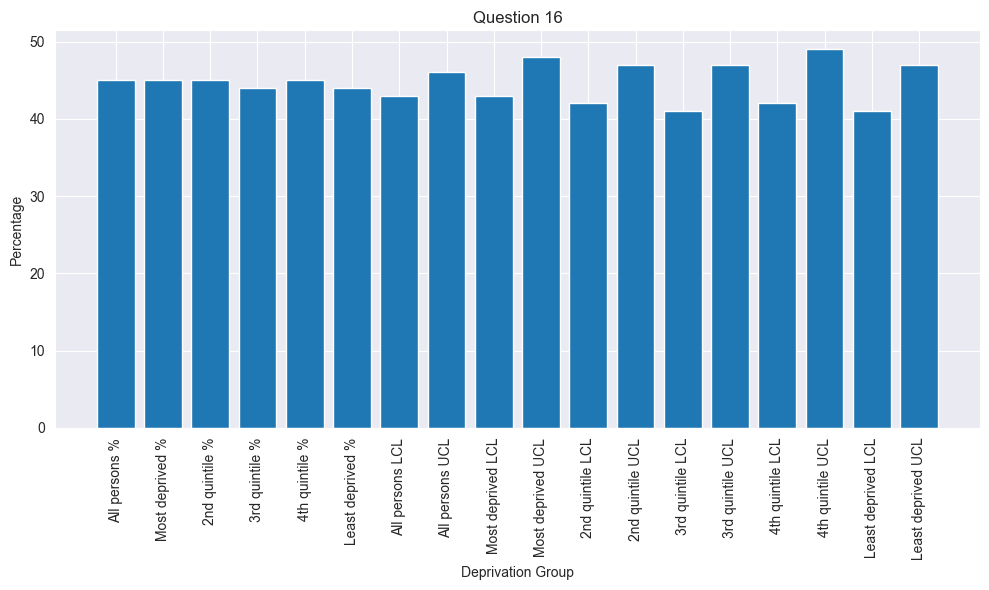

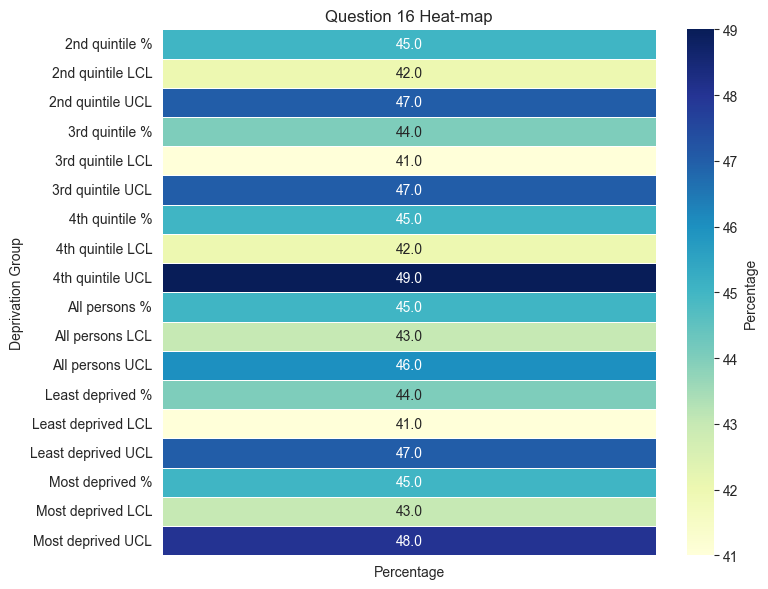

In [16]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[15:16]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
sixteenth_question = df_for_cleaning.loc[16, 'questions']
sixteenth_response = df_for_cleaning.loc[16, 'response']
print("Sixteenth Question:", sixteenth_question)
print("Response to the Sixteenth Question:", sixteenth_question)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 16')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 16 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

Seventeenth Question:

At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?

Response to the Seventeenth Question:

No access to any device


Seventeenth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the Seventeenth Question: No access to any device


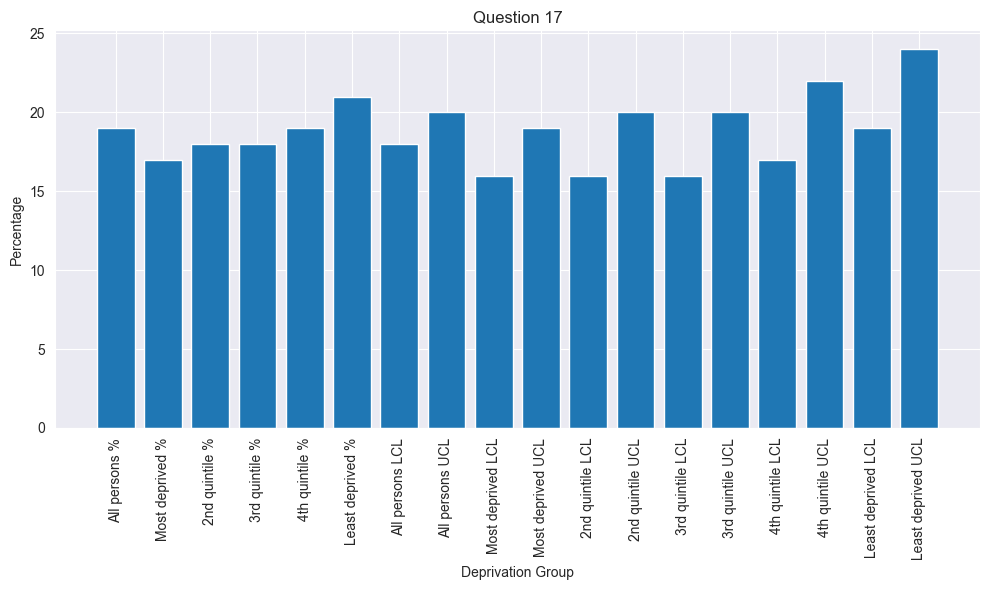

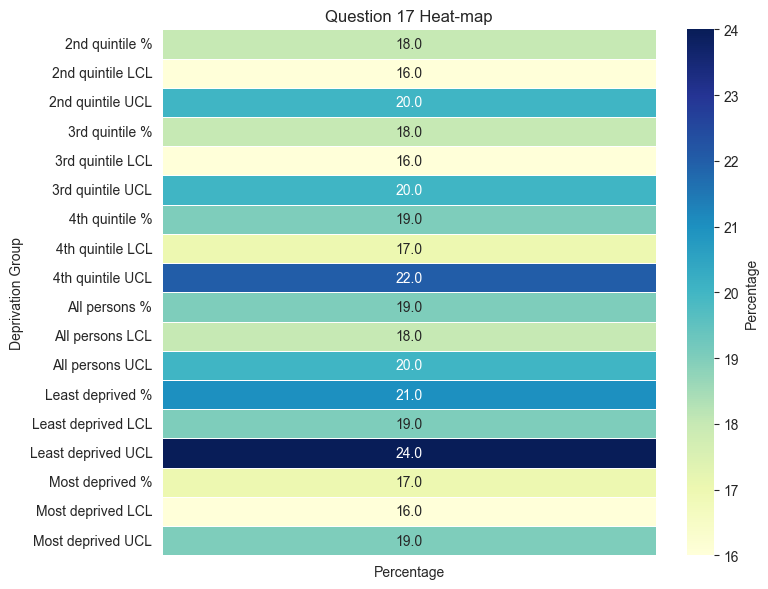

In [17]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[16:17]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
seventeenth_question = df_for_cleaning.loc[17, 'questions']
seventeenth_response = df_for_cleaning.loc[17, 'response']
print("Seventeenth Question:", fifteenth_question)
print("Response to the Seventeenth Question:", seventeenth_response)
#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 17')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 17 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

TwentyThird Question:

 At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?

 
Response to the TwentyThird Question:

 At least monthly (less than weekly)


TwentyThird Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the TwentyThird Question: At least monthly (less than weekly)


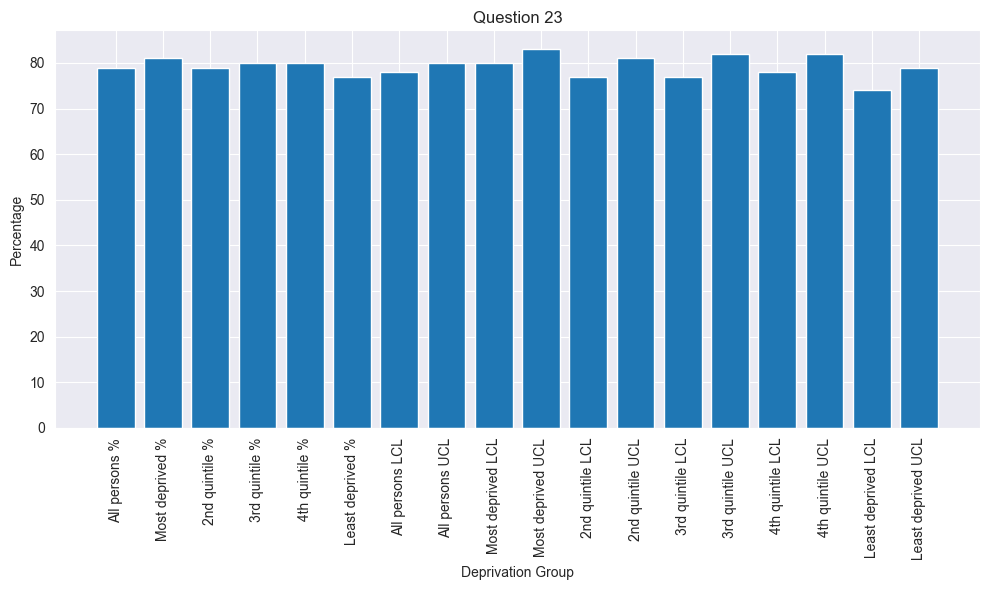

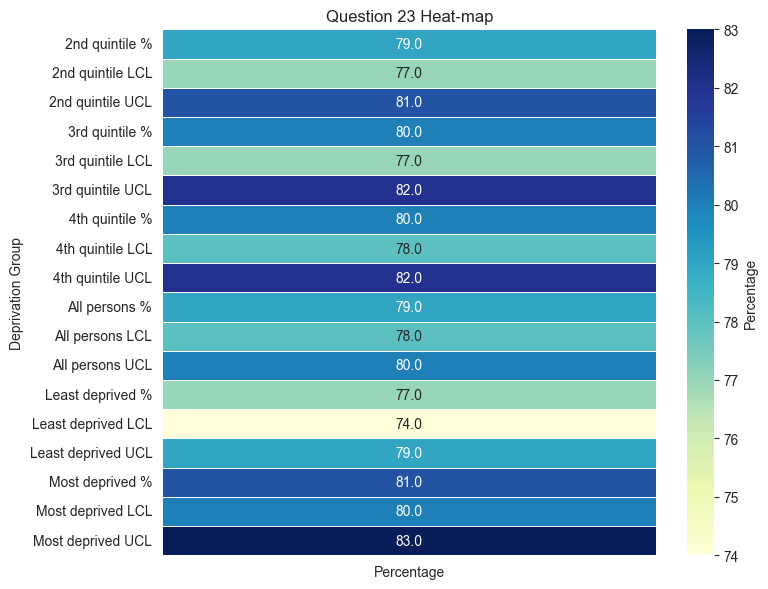

In [18]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[22:23]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
twentythird_question = df_for_cleaning.loc[23, 'questions']
twentythird_response = df_for_cleaning.loc[23, 'response']
print("TwentyThird Question:", fifteenth_question)
print("Response to the TwentyThird Question:", twentythird_response)
#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 23')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 23 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

TwentyFourth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the TwentyFourth Question: Less than monthly or not at all



TwentyFourth Question: At the start of the first lockdown, that is in April 2020, did you have a suitable device - for example, a laptop, tablet or Chromebook - to access online work?
Response to the TwentyFourth Question: Less than monthly or not at all


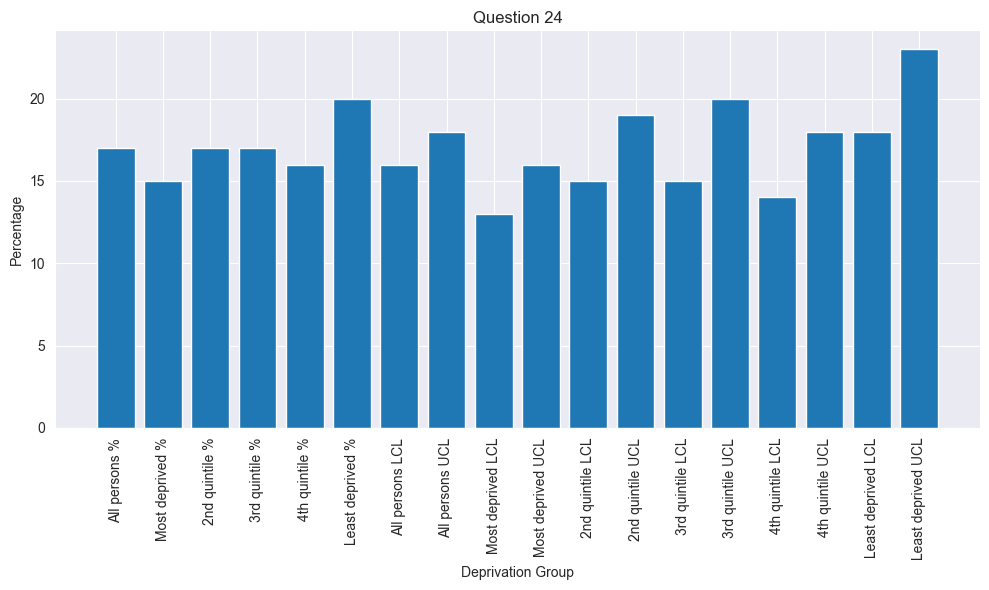

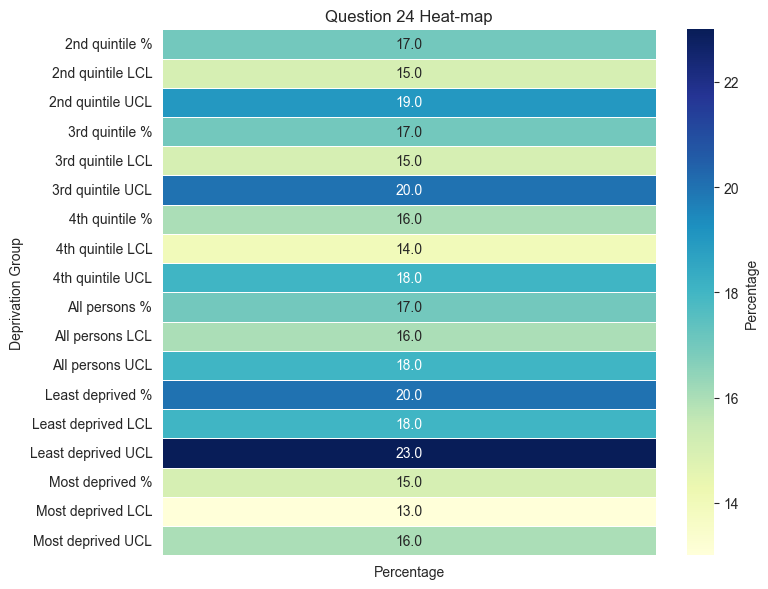

In [19]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[23:24]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
twentyfourth_question = df_for_cleaning.loc[24, 'questions']
twentyfourth_response = df_for_cleaning.loc[24, 'response']
print("TwentyFourth Question:", fifteenth_question)
print("Response to the TwentyFourth Question:", twentyfourth_response)
#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 24')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 24 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

Thirtyeighth Question: And at any point during that time in Year 10 ‚Äì that is, April to July 2020, did you have any of these problems? [note 2]
Response to the Thirtyeighth Question: Feeling unmotivated, struggled to engage with my studies or work


Thirtyeighth Question: And at any point during that time in Year 10 – that is, April to July 2020, did you have any of these problems? [note 2]
Response to the Thirtyeighth Question: Feeling unmotivated, struggled to engage with my studies or work


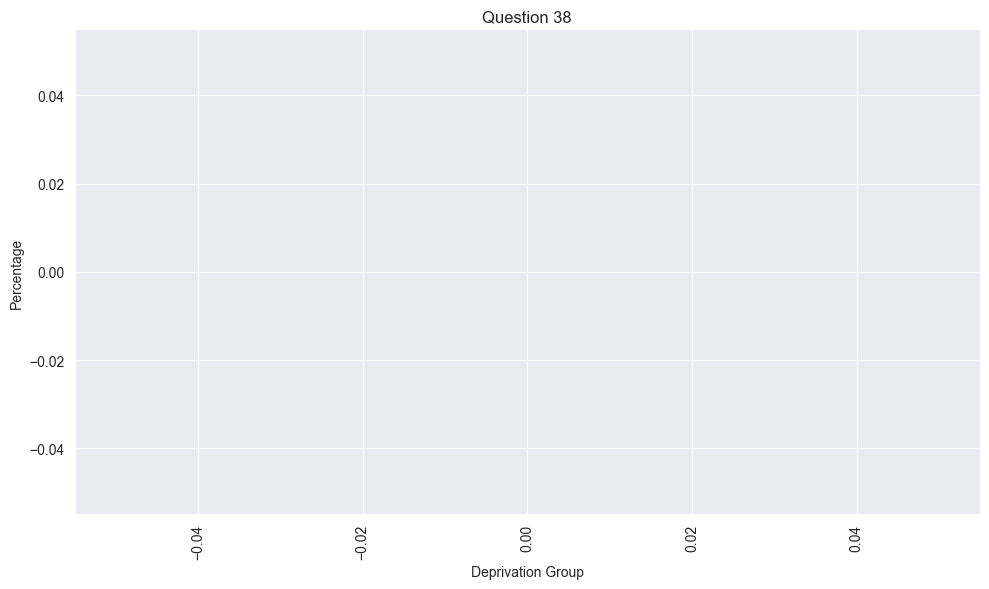

In [20]:
#plotting second question 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#melting  dataframe for plotiing 

df_numeric = df_for_cleaning.select_dtypes(include=['float', 'int']).iloc[37:38]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
thirtyeighth_question = df_for_cleaning.loc[38, 'questions']
thirtyeighth_response = df_for_cleaning.loc[38, 'response']
print("Thirtyeighth Question:", thirtyeighth_question)
print("Response to the Thirtyeighth Question:", thirtyeighth_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 38')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()






In [21]:
# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 38 Heat-map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>